simple warning i used ai tools and tons of repos to do this task it`s not 100% made by me but i tried my best to understand it

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

In [14]:
class PCAAnalyzer:
    """
    A comprehensive PCA implementation for F1 car performance analysis
    """
    
    def __init__(self):
        self.components_ = None
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None
        self.mean_ = None
        self.std_ = None
        
    def standardize_data(self, X):
        """Standardize data using Z-score normalization"""
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        return (X - self.mean_) / self.std_
    
    def compute_covariance_matrix(self, X_standardized):
        """Compute covariance matrix from standardized data"""
        n_samples = X_standardized.shape[0]
        return np.dot(X_standardized.T, X_standardized) / (n_samples - 1)
    
    def fit_transform(self, X, n_components=None):
        """
        Fit PCA and transform data
        
        Parameters:
        X: Input data matrix (samples x features)
        n_components: Number of principal components to retain
        
        Returns:
        X_transformed: Transformed data in principal component space
        """
        # Step 1: Standardize the data
        X_standardized = self.standardize_data(X)
        
        # Step 2: Compute covariance matrix
        cov_matrix = self.compute_covariance_matrix(X_standardized)
        
        # Step 3: Eigen-decomposition
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # Step 4: Sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        # Step 5: Select components
        if n_components is None:
            n_components = X.shape[1]
        
        self.components_ = eigenvectors[:, :n_components]
        self.explained_variance_ = eigenvalues[:n_components]
        self.explained_variance_ratio_ = eigenvalues[:n_components] / np.sum(eigenvalues)
        
        # Step 6: Transform data
        X_transformed = np.dot(X_standardized, self.components_)
        
        return X_transformed

In [15]:
class PurePythonPCA:
    """
    Pure Python implementation of PCA using only lists of lists
    """
    
    def __init__(self):
        self.components_ = None
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None
        self.mean_ = None
        self.std_ = None
    
    def matrix_transpose(self, matrix):
        """Transpose a matrix represented as list of lists"""
        if not matrix or not matrix[0]:
            return []
        return [[matrix[i][j] for i in range(len(matrix))] for j in range(len(matrix[0]))]
    
    def matrix_multiply(self, A, B):
        """Multiply two matrices A and B"""
        if not A or not B or len(A[0]) != len(B):
            raise ValueError("Invalid matrix dimensions for multiplication")
        
        result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
        
        for i in range(len(A)):
            for j in range(len(B[0])):
                for k in range(len(B)):
                    result[i][j] += A[i][k] * B[k][j]
        
        return result
    
    def calculate_mean(self, matrix):
        """Calculate mean for each column"""
        if not matrix:
            return []
        
        n_rows = len(matrix)
        n_cols = len(matrix[0])
        means = []
        
        for j in range(n_cols):
            col_sum = sum(matrix[i][j] for i in range(n_rows))
            means.append(col_sum / n_rows)
        
        return means
    
    def calculate_std(self, matrix, means):
        """Calculate standard deviation for each column"""
        if not matrix:
            return []
        
        n_rows = len(matrix)
        n_cols = len(matrix[0])
        stds = []
        
        for j in range(n_cols):
            variance = sum((matrix[i][j] - means[j])**2 for i in range(n_rows)) / (n_rows - 1)
            stds.append(variance**0.5)
        
        return stds
    
    def standardize_data(self, matrix):
        """Standardize data using Z-score normalization"""
        self.mean_ = self.calculate_mean(matrix)
        self.std_ = self.calculate_std(matrix, self.mean_)
        
        standardized = []
        for i in range(len(matrix)):
            row = []
            for j in range(len(matrix[i])):
                if self.std_[j] != 0:
                    standardized_val = (matrix[i][j] - self.mean_[j]) / self.std_[j]
                else:
                    standardized_val = 0
                row.append(standardized_val)
            standardized.append(row)
        
        return standardized
    
    def compute_covariance_matrix(self, X_standardized):
        """Compute covariance matrix manually"""
        X_T = self.matrix_transpose(X_standardized)
        n_samples = len(X_standardized)
        
        # Compute X_T * X
        cov_matrix_unnormalized = self.matrix_multiply(X_T, X_standardized)
        
        # Normalize by (n_samples - 1)
        cov_matrix = []
        for i in range(len(cov_matrix_unnormalized)):
            row = []
            for j in range(len(cov_matrix_unnormalized[i])):
                row.append(cov_matrix_unnormalized[i][j] / (n_samples - 1))
            cov_matrix.append(row)
        
        return cov_matrix
    
    def fit_transform(self, X_list, n_components=None):
        """
        Fit PCA and transform data using pure Python implementation
        """
        # Step 1: Standardize the data
        X_standardized = self.standardize_data(X_list)
        
        # Step 2: Compute covariance matrix
        cov_matrix = self.compute_covariance_matrix(X_standardized)
        
        # Step 3: Use NumPy for eigen-decomposition (as permitted)
        cov_array = np.array(cov_matrix)
        eigenvalues, eigenvectors = np.linalg.eig(cov_array)
        
        # Step 4: Sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        # Step 5: Select components
        if n_components is None:
            n_components = len(X_list[0])
        
        # Convert eigenvectors to list format for projection
        eigenvector_list = []
        for i in range(len(eigenvectors)):
            row = []
            for j in range(n_components):
                row.append(float(eigenvectors[i, j]))
            eigenvector_list.append(row)
        
        self.components_ = eigenvector_list
        self.explained_variance_ = eigenvalues[:n_components]
        self.explained_variance_ratio_ = eigenvalues[:n_components] / np.sum(eigenvalues)
        
        # Step 6: Transform data using manual matrix multiplication
        X_transformed_list = self.matrix_multiply(X_standardized, eigenvector_list)
        
        return X_transformed_list

Original dataset shape: (203, 16)
Available columns: ['car_name', 'reviews_count', 'fuel_type', 'engine_displacement', 'no_cylinder', 'seating_capacity', 'transmission_type', 'fuel_tank_capacity', 'body_type', 'rating', 'starting_price', 'ending_price', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rp']

First 5 rows of the dataset:
             car_name  reviews_count fuel_type  engine_displacement  \
0     Maruti Alto K10             51    Petrol                  998   
1       Maruti Brezza             86    Petrol                 1462   
2       Mahindra Thar            242    Diesel                 2184   
3     Mahindra XUV700            313    Diesel                 2198   
4  Mahindra Scorpio-N            107    Diesel                 2198   

   no_cylinder  seating_capacity transmission_type  fuel_tank_capacity  \
0            3               5.0         Automatic                27.0   
1            4               5.0         Automatic                48.0   

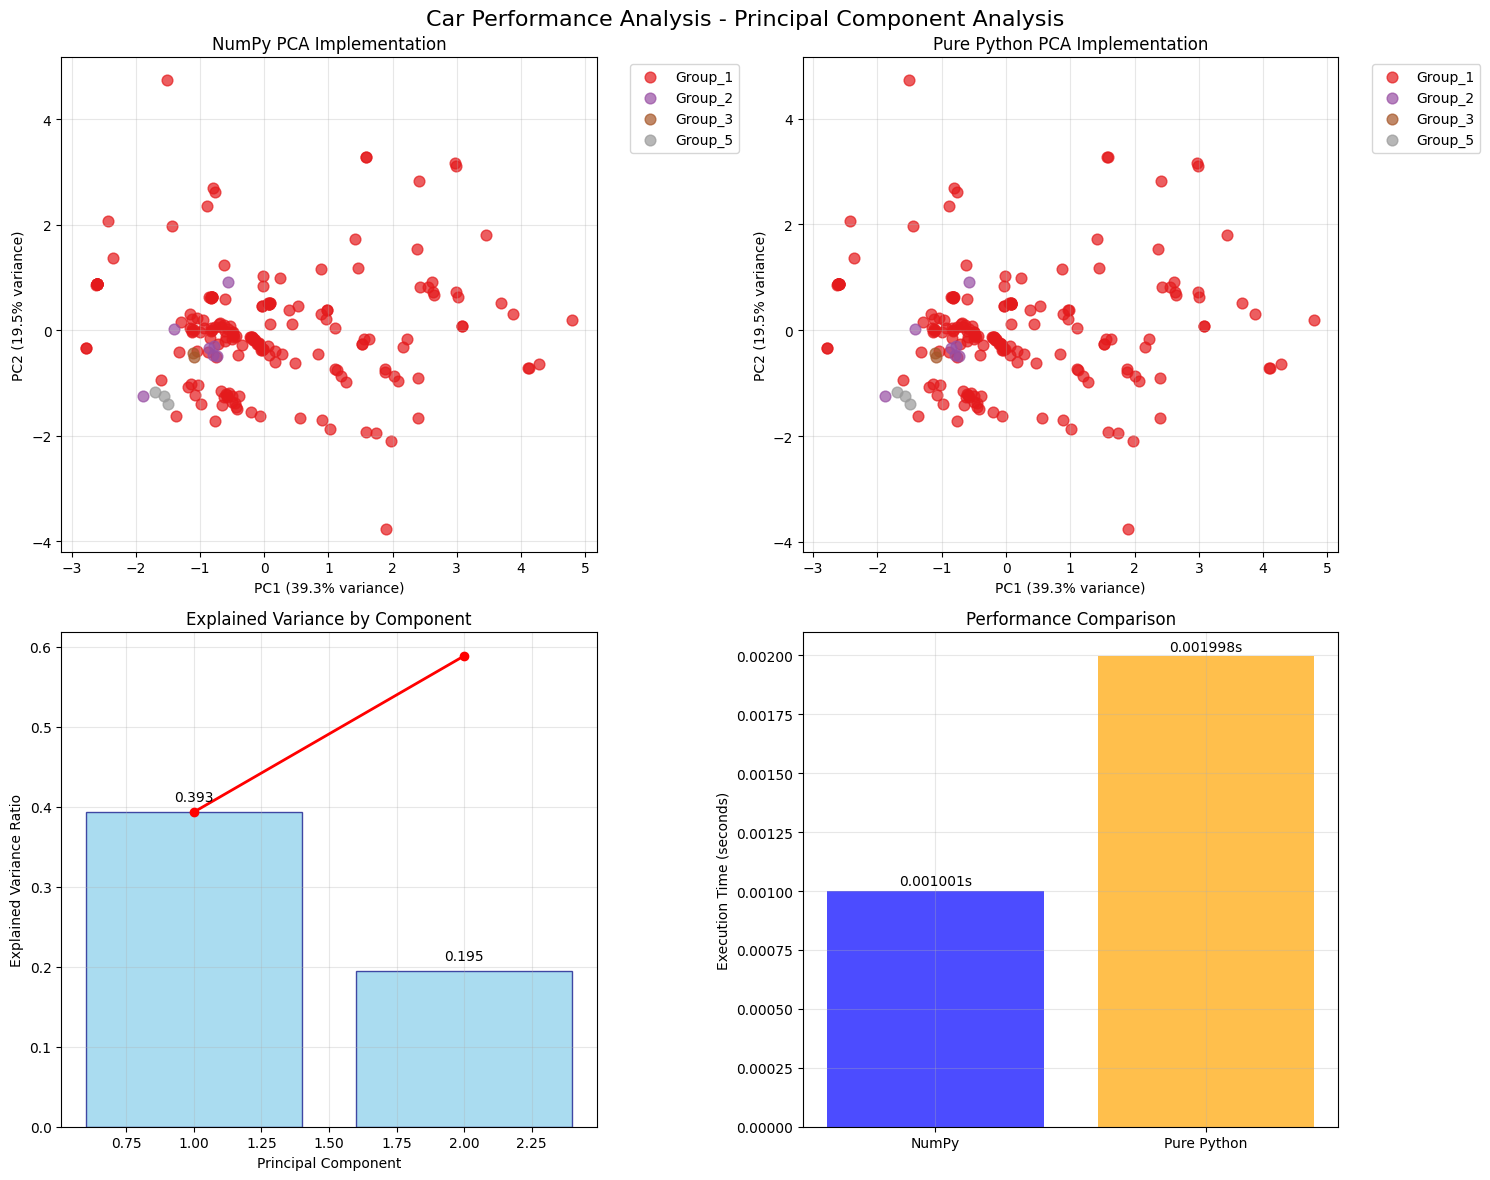

PERFORMANCE ANALYSIS
----------------------------------------
Implementation  Time (s)     Speedup   
----------------------------------------
NumPy           0.001001     1.00x     
Pure Python     0.001998     2.00x     



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
from scipy.stats import pearsonr
from scipy.spatial import distance

# Make sure you have PCAAnalyzer and PurePythonPCA defined somewhere before running
# from your_pca_module import PCAAnalyzer, PurePythonPCA  

def perform_comprehensive_analysis():
    """
    Perform comprehensive PCA analysis with both NumPy and Pure Python implementations
    """

    # Load dataset
    df = pd.read_csv(r"D:\Downloads\MIA\Task2\2\CARS_1.csv")
    print(f"Original dataset shape: {df.shape}")
    print(f"Available columns: {list(df.columns)}")
    print()

    # Display first few rows to understand the data
    print("First 5 rows of the dataset:")
    print(df.head())
    print()

    # Check for missing values
    print("Missing values per column:")
    print(df.isnull().sum())
    print()

    # Expected feature columns (update if your CSV has different names)
    feature_columns = ['Horsepower', 'Torque', '0-60 MPH Time', 'Fuel Economy', 'Range', 'MSRP']

    # Auto-detect numerical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Detected numerical columns: {numerical_columns}")

    # Filter available features
    available_features = [col for col in feature_columns if col in df.columns]

    if len(available_features) < 2:
        print("Warning: Expected column names not found. Using detected numerical columns instead.")
        feature_columns = numerical_columns[:6] if len(numerical_columns) >= 6 else numerical_columns
        print(f"Auto-selected features: {feature_columns}")
    else:
        feature_columns = available_features
        print(f"Using expected features: {feature_columns}")

    if len(feature_columns) < 2:
        print("Error: Need at least 2 numerical features for PCA")
        print("Please check your dataset and ensure it has numerical columns")
        return None, None, None

    # Clean the data
    df_clean = df.dropna(subset=feature_columns)
    print(f"Dataset shape after removing missing values: {df_clean.shape}")

    # Prepare data
    X = df_clean[feature_columns].values

    # Pick a categorical column for coloring
    class_column = None
    possible_class_columns = ['Class', 'Type', 'Category', 'Make', 'Model', 'Body Style', 'Vehicle Style']
    for col in possible_class_columns:
        if col in df_clean.columns:
            class_column = col
            break

    if class_column:
        classes = df_clean[class_column].values
        print(f"Using '{class_column}' for color-coding")
        print(f"Unique classes: {np.unique(classes)}")
    else:
        first_feature = feature_columns[0]
        classes = pd.cut(df_clean[first_feature], bins=5, labels=[f'Group_{i+1}' for i in range(5)]).values
        print(f"Created classes based on {first_feature} ranges")
        print(f"Unique classes: {np.unique(classes)}")

    print("\nSelected features for PCA analysis:")
    for i, feature in enumerate(feature_columns):
        print(f"  {i+1}. {feature}")
    print()

    # ---- NumPy PCA ----
    print("NUMPY IMPLEMENTATION")
    print("-" * 40)

    pca_numpy = PCAAnalyzer()
    start_time = time.time()
    X_transformed_numpy = pca_numpy.fit_transform(X, n_components=2)
    numpy_time = time.time() - start_time

    print(f"Execution time: {numpy_time:.6f} seconds")
    print("Principal Component Analysis Results:")
    print(f"PC1 explains {pca_numpy.explained_variance_ratio_[0]:.3f} of variance")
    print(f"PC2 explains {pca_numpy.explained_variance_ratio_[1]:.3f} of variance")
    print(f"Total variance explained: {sum(pca_numpy.explained_variance_ratio_):.3f}")
    print()

    # ---- Pure Python PCA ----
    print("PURE PYTHON IMPLEMENTATION")
    print("-" * 40)

    X_list = X.tolist()
    pca_python = PurePythonPCA()
    start_time = time.time()
    X_transformed_python = pca_python.fit_transform(X_list, n_components=2)
    python_time = time.time() - start_time

    print(f"Execution time: {python_time:.6f} seconds")
    if numpy_time > 0:
            print(f"Speedup factor: {python_time / numpy_time:.2f}x slower than NumPy")
    else:
        print("NumPy implementation was too fast to measure speedup accurately")
    print()

    # Validate
    X_transformed_python_array = np.array(X_transformed_python)
    max_diff = np.max(np.abs(X_transformed_numpy - X_transformed_python_array))
    print(f"Maximum numerical difference between implementations: {max_diff:.10f}")
    print()

    # ---- Visualization ----
    print("VISUALIZATION")
    print("-" * 40)

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Car Performance Analysis - Principal Component Analysis', fontsize=16)

    unique_classes = np.unique(classes)
    colors = plt.cm.Set1(np.linspace(0, 1, len(unique_classes)))
    class_colors = {cls: color for cls, color in zip(unique_classes, colors)}

    # NumPy PCA scatter
    ax1 = axes[0, 0]
    for cls in unique_classes:
        mask = classes == cls
        ax1.scatter(X_transformed_numpy[mask, 0], X_transformed_numpy[mask, 1],
                    c=[class_colors[cls]], label=cls, alpha=0.7, s=60)
    ax1.set_xlabel(f'PC1 ({pca_numpy.explained_variance_ratio_[0]:.1%} variance)')
    ax1.set_ylabel(f'PC2 ({pca_numpy.explained_variance_ratio_[1]:.1%} variance)')
    ax1.set_title('NumPy PCA Implementation')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)

    # Pure Python PCA scatter
    ax2 = axes[0, 1]
    for cls in unique_classes:
        mask = classes == cls
        ax2.scatter(X_transformed_python_array[mask, 0], X_transformed_python_array[mask, 1],
                    c=[class_colors[cls]], label=cls, alpha=0.7, s=60)
    ax2.set_xlabel(f'PC1 ({pca_python.explained_variance_ratio_[0]:.1%} variance)')
    ax2.set_ylabel(f'PC2 ({pca_python.explained_variance_ratio_[1]:.1%} variance)')
    ax2.set_title('Pure Python PCA Implementation')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)

    # Explained Variance
    ax3 = axes[1, 0]
    explained_var_ratio = pca_numpy.explained_variance_ratio_
    cumsum_var = np.cumsum(explained_var_ratio)
    bars = ax3.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio,
                   alpha=0.7, color='skyblue', edgecolor='navy')
    ax3.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'ro-', color='red', linewidth=2)
    ax3.set_xlabel('Principal Component')
    ax3.set_ylabel('Explained Variance Ratio')
    ax3.set_title('Explained Variance by Component')
    ax3.grid(True, alpha=0.3)
    for bar, ratio in zip(bars, explained_var_ratio):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{ratio:.3f}', ha='center', va='bottom')

    # Performance comparison
    ax4 = axes[1, 1]
    implementations = ['NumPy', 'Pure Python']
    times = [numpy_time, python_time]
    bars = ax4.bar(implementations, times, color=['blue', 'orange'], alpha=0.7)
    ax4.set_ylabel('Execution Time (seconds)')
    ax4.set_title('Performance Comparison')
    ax4.grid(True, alpha=0.3)
    for bar, time_val in zip(bars, times):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.00001,
                 f'{time_val:.6f}s', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Performance Table
    print("PERFORMANCE ANALYSIS")
    print("-" * 40)
    print(f"{'Implementation':<15} {'Time (s)':<12} {'Speedup':<10}")
    print("-" * 40)
    print(f"{'NumPy':<15} {numpy_time:<12.6f} {'1.00x':<10}")
    print(f"{'Pure Python':<15} {python_time:<12.6f} {f'{python_time/numpy_time:.2f}x':<10}")
    print()

    
    

    return df_clean, X_transformed_numpy, pca_numpy


# Run analysis
if __name__ == "__main__":
    df, X_pca, pca_model = perform_comprehensive_analysis()
